# 프로야구선수 다음해 연봉예측 (연습)

In [1]:
# 프로야구 연봉 데이터셋의 기본 정보 구하기

# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib as mpl

# Windows에서 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'MS Gothic'
mpl.rcParams['axes.unicode_minus'] = False


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

picher_file_path  = './data/picher_stats_2017.csv'
batter_file_path  = './data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)  

In [2]:
picher.columns
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [3]:
print(picher.shape)

(152, 22)


In [4]:
# 예측할 대상인 '연봉'에 대한 정보
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

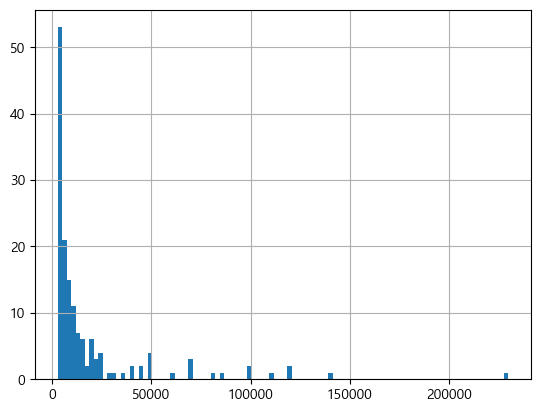

In [5]:
# 2018년 연봉 분포 시각화
picher['연봉(2018)'].hist(bins=100)
# 단위는 만원 

<Axes: >

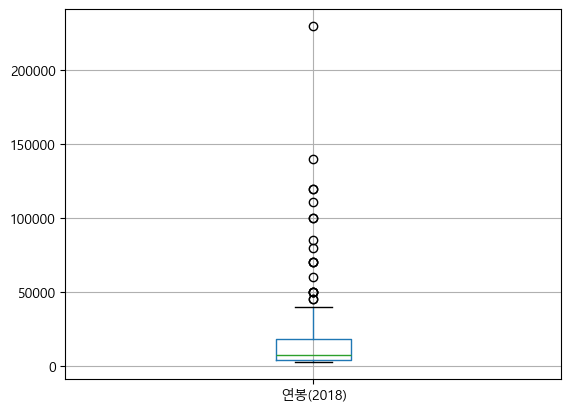

In [6]:
picher.boxplot(column=['연봉(2018)'])
# 연봉의 상자 그림을 출력

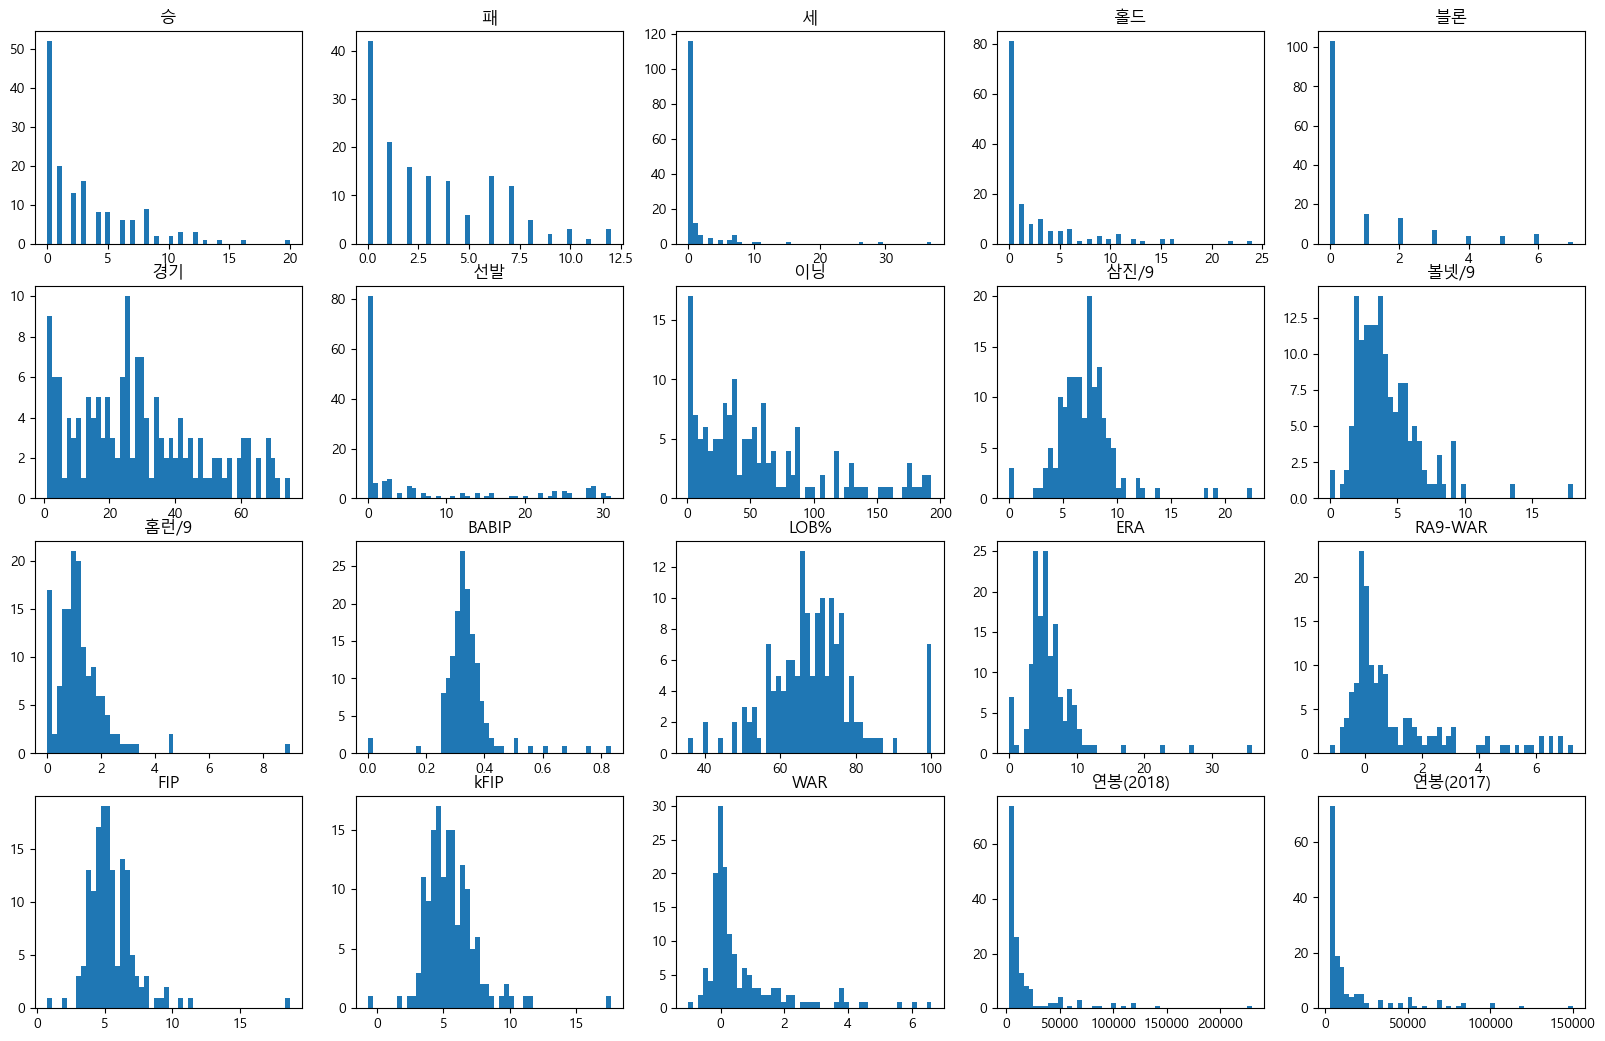

In [7]:
# 회귀 분석에 사용할 피처 살펴보기

picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP','WAR' , '연봉(2018)', '연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력

def plot_hist_each_feature(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

plot_hist_each_feature(picher_features_df)

## 예측 : 투수의 연봉 예측하기 

In [8]:
# 피처들의 단위 맞춰주기 : 피처 스케일링 (표준화)

# 판다스 형태로 정의된 데이터 출력할 때, scientific notation(과학적 표기법) 사용하지 않도록 설정
pd.options.mode.chained_assignment = None  # default='warn'

# 피처 각각에 대한 스케일링을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for column in scale_columns:
        series_mean = df[column].mean()
        series_std = df[column].std()
        df[column] = df[column].apply(lambda x: (x - series_mean) / series_std)
    return df


# 피처 각각에 대한 스케일링을 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR' , '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [9]:
## 피처들의 단위 맞춰주기: 원-핫 인코딩 (범주형 피처 처리)

# 팀명 피처를 원-핫 인코딩으로 변환
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False


In [11]:
## 회귀 분석을 위한 학습, 테스트 데이터셋 분리

from sklearn import linear_model
from sklearn.model_selection import train_test_split    
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리
x = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)


In [12]:
# 회귀 분석 계수 학습 & 학습된 계수 출력

# 회귀 분석 계수를 학습합니다. (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

# 학습된 계수를 출력
print('회귀 분석 계수:', lr.coef_)

회귀 분석 계수: [ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [17]:
## 어떤 피처가 가장 영향력이 강한 피처일까

import statsmodels.api as sm

# 데이터 타입을 숫자형으로 변환
x_train_numeric = x_train.astype(float)
y_train_numeric = y_train.astype(float)



x_train_numeric = sm.add_constant(x_train_numeric)  # 상수항 추가
model = sm.OLS(y_train_numeric, x_train_numeric).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           7.70e-42
Time:                        20:16:37   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.0

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

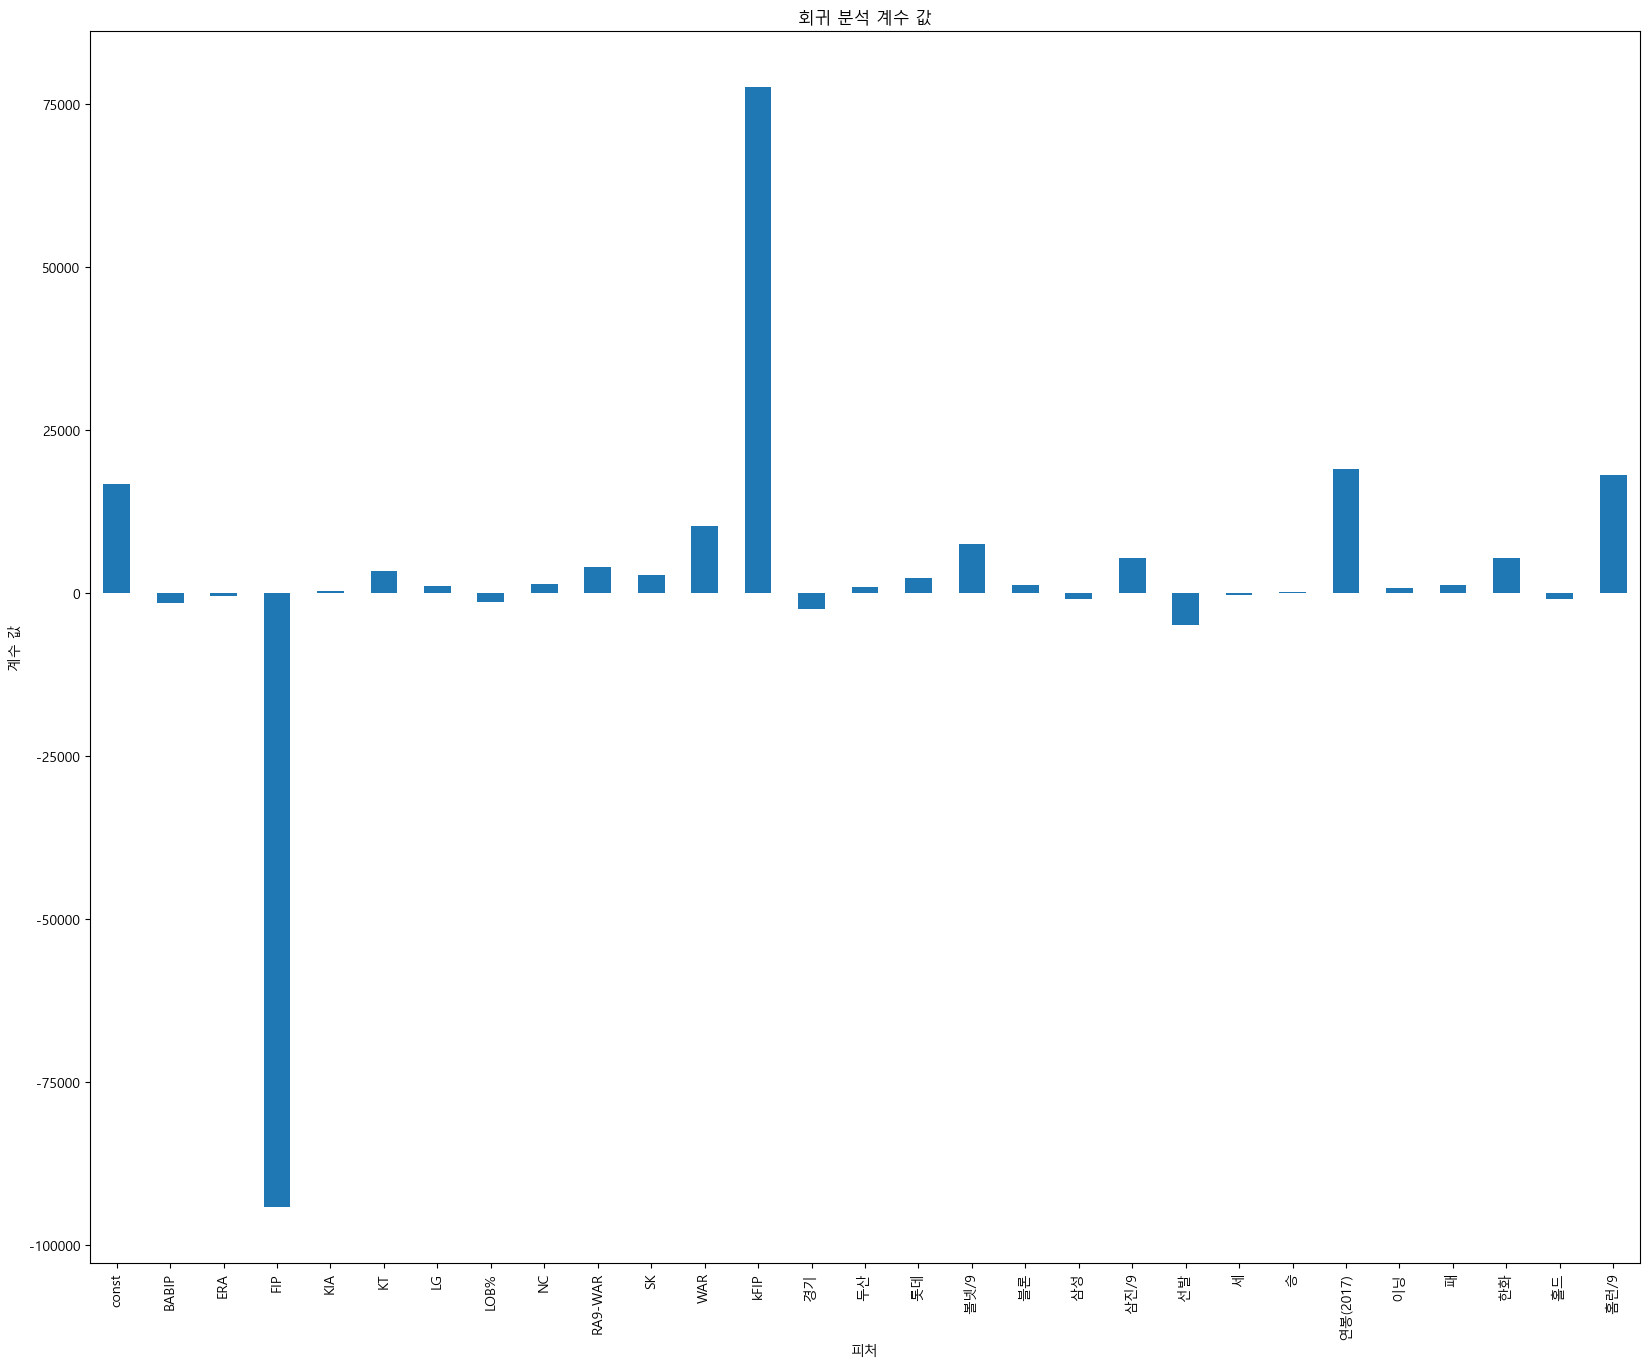

In [19]:
# 한글 출력을 위한 사전 설정 단계 
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

# 회귀 계수를 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('회귀 분석 계수 값')
ax.set_xlabel('피처')
ax.set_ylabel('계수 값')
ax.set_xticklabels(x_labels)

위 코드의 시각화 결과, FIP, WAR, 홈런, 작년 연봉 피처가 가장 영향력이 큰 것으로 보임 

In [ ]:
## 예측 모델의 평가하기 : R2 SCORE

# 학습 데이터와 테스트 데이터로 분리 
x = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

# 회귀 분석 모델 평가
print('학습 데이터셋 R2 score: {:.2f}'.format(model.score(x_train, y_train)))
print('테스트 데이터셋 R2 score: {:.2f}'.format(model.score(x_test, y_test)))

# 학습과 테스트 데이터셋에 대한 두 점수는 최대한 벌어지지 않는 것이 좋음

학습 데이터셋 R2 score: 0.93
테스트 데이터셋 R2 score: 0.89


In [21]:
## 예측 모델의 평가하기 : RMSE 계산하기

y_predictions = lr.predict(x_train)
print('학습 데이터셋 RMSE: {:.2f}'.format(sqrt(mean_squared_error(y_train, y_predictions)))) # train RMSE score 출력
y_predictions = lr.predict(x_test)
print('테스트 데이터셋 RMSE: {:.2f}'.format(sqrt(mean_squared_error(y_test, y_predictions))))  # test RMSE score 출력


학습 데이터셋 RMSE: 7282.72
테스트 데이터셋 RMSE: 14310.70


In [22]:
## 피처들의 상관 관계 분석하기

import seaborn as sns

# 피처들의 상관 관계 분석
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'salary(2017)']  


# corr 행렬 히트맵을 시각화
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=show_cols, 
                 xticklabels=show_cols)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'